In [4]:
from collections import Counter
def gini_impurity(y):
    counts= Counter(y)
    impurity= 1 - sum([(count/len(y))**2 for count in counts.values()])
    return impurity
gini_impurity(['M','M','M','F','F','F'])

0.5

In [5]:
gini_impurity(['M','M','M','M','F','F'])

0.4444444444444444

In [6]:
import math
def entropy(y):
    counts= Counter(y)
    entropy= - sum([(count/len(y)) * math.log2(count/len(y)) for count in counts.values()])
    return entropy
entropy(['M','M','M','F','F','F'])

1.0

In [7]:
entropy(['M','M','M','M','F','F'])

0.9182958340544896

### Decision Tree on Obese Dataset

In [8]:
import pandas as pd
d=pd.DataFrame({'Gender':['Male','Male','Female','Female','Male','Male','Male','Male','Male','Female'],
               'Height':[174,189,185,195,149,189,147,154,174,169],
               'Weight':[96,87,110,104,61,104,92,111,90,103],
               'Obese':[1,0,1,0,0,0,1,1,0,1]})
d

,Gender,Height,Weight,Obese
0,Male,174,96,1
1,Male,189,87,0
2,Female,185,110,1
3,Female,195,104,0
4,Male,149,61,0
5,Male,189,104,0
6,Male,147,92,1
7,Male,154,111,1
8,Male,174,90,0
9,Female,169,103,1


### Using gini index

In [9]:
from collections import Counter
def compute_gini_impurity(d,feature_col,split_value):
    left_branch= d[d[feature_col] <= split_value]
    right_branch= d[d[feature_col] > split_value]
    total_samples= len(d)
    
    def calculate_impurity(branch):
        if len(branch)==0:
            return 0
        counts= Counter(branch['Obese'])
        impurity= 1-sum([(count/len(branch))**2 for count in counts.values()])
        return impurity
    
    gini_left= calculate_impurity(left_branch)
    gini_right= calculate_impurity(right_branch)
    print('Gini index for left branch=',gini_left,'& Gini index for right branch=',gini_right)
    
    weight_left= len(left_branch)/total_samples
    weight_right= len(right_branch)/total_samples
    weighted_avg_gini= (weight_left * gini_left) + (weight_right * gini_right)
    print('weighted sum=',weighted_avg_gini)

In [10]:
compute_gini_impurity(d,'Height',179.5)

Gini index for left branch= 0.4444444444444444 & Gini index for right branch= 0.375
weighted sum= 0.4166666666666667


In [11]:
compute_gini_impurity(d,'Gender','Female')

Gini index for left branch= 0.4444444444444444 & Gini index for right branch= 0.48979591836734704
weighted sum= 0.4761904761904763


### Using entropy

In [12]:
import math
from collections import Counter
def compute_entropy(d,feature_col,split_value):
    left_branch= d[d[feature_col] <= split_value]
    right_branch= d[d[feature_col] > split_value]
    total_samples= len(d)
    
    def calculate_entropy(branch):
        if len(branch)==0:
            return 0
        counts= Counter(branch['Obese'])
        entropy= - sum([(count/len(branch)) * math.log2(count/len(branch)) for count in counts.values()])
        return entropy
    
    entropy_left= calculate_entropy(left_branch)
    entropy_right= calculate_entropy(right_branch)
    print('Entropy for left branch=',entropy_left,'& Entropy for right branch=',entropy_right)
    
    weight_left= len(left_branch)/total_samples
    weight_right= len(right_branch)/total_samples
    weighted_avg_entropy= (weight_left * entropy_left) + (weight_right * entropy_right)
    print('weighted sum=',weighted_avg_entropy)

In [13]:
compute_entropy(d,'Height',179.5)

Entropy for left branch= 0.9182958340544896 & Entropy for right branch= 0.8112781244591328
weighted sum= 0.8754887502163469


In [14]:
compute_entropy(d,'Gender','Female')

Entropy for left branch= 0.9182958340544896 & Entropy for right branch= 0.9852281360342515
weighted sum= 0.965148445440323


In [23]:
df=pd.read_csv('data.csv')
df['Obese']= df['Index'].apply(lambda x: 1 if x>3 else 0)
df.drop(columns=['Index'],inplace=True)
df

,Gender,Height,Weight,Obese
0,Male,174,96,1
1,Male,189,87,0
2,Female,185,110,1
3,Female,195,104,0
4,Male,149,61,0
...,...,...,...,...
495,Female,150,153,1
496,Female,184,121,1
497,Female,141,136,1
498,Male,150,95,1


In [24]:
compute_gini_impurity(df,'Height',179.5)

Gini index for left branch= 0.3680675529605233 & Gini index for right branch= 0.49711022194863386
weighted sum= 0.4122001457544571


In [25]:
compute_gini_impurity(df,'Gender','Female')

Gini index for left branch= 0.45902345251826215 & Gini index for right branch= 0.44261557684298203
weighted sum= 0.4509835934373749


In [26]:
compute_entropy(df,'Height',179.5)

Entropy for left branch= 0.8002576683372442 & Entropy for right branch= 0.9958269063289604
weighted sum= 0.8671423477304112


In [27]:
compute_entropy(df,'Gender','Female')

Entropy for left branch= 0.9400481779747518 & Entropy for right branch= 0.9155506778147324
weighted sum= 0.9280444028963423


### Using scikit learn

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

X= df.drop('Obese', axis=1) # features
y=df['Obese'] # target

X_encoded= X.apply(LabelEncoder().fit_transform)

# splitting data into training & testing sets
X_train,X_test,y_train,y_test= train_test_split(X_encoded, y, test_size= 0.2, random_state= 42)

# initialize the decision tree classifier
tree_classifier= DecisionTreeClassifier(random_state= 7)

# train the classifier on the training data
tree_classifier.fit(X_train, y_train)

# make predictions on the testing data
y_pred= tree_classifier.predict(X_test)

# evaluate the model's accuracy
print('Accuracy =',accuracy_score(y_test, y_pred))

Accuracy = 0.97


In [29]:
tree_gini= DecisionTreeClassifier(criterion='gini', random_state= 42)
tree_entropy= DecisionTreeClassifier(criterion='entropy', random_state= 42)

tree_gini.fit(X_train, y_train)
tree_entropy.fit(X_train, y_train)

y_pred_gini= tree_gini.predict(X_test)
y_pred_entropy= tree_entropy.predict(X_test)

print('Accuracy with Gini Impurity =',accuracy_score(y_test, y_pred_gini))
print('Accuracy with Entropy =',accuracy_score(y_test, y_pred_entropy))

Accuracy with Gini Impurity = 0.96
Accuracy with Entropy = 0.95


### Visualizing the decision tree

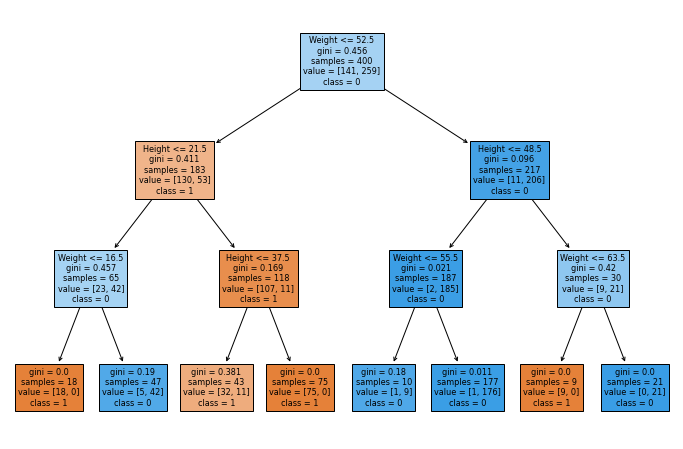

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

feature_names= list(df.columns)
class_names= df['Obese'].unique().astype(str)

clf= DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

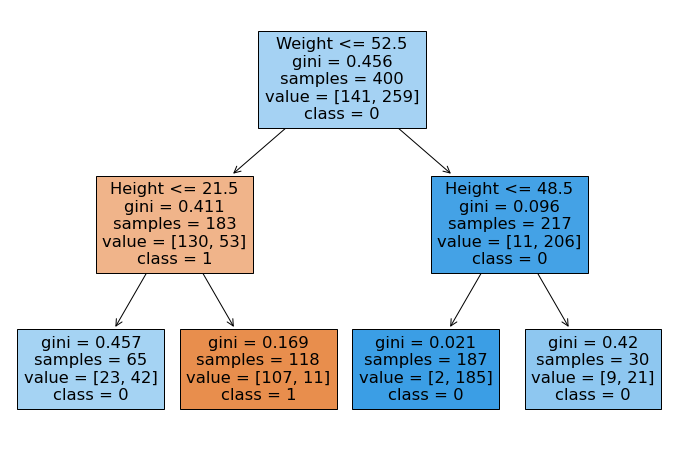

In [31]:
clf= DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, 
          feature_names=feature_names, class_names=class_names)
plt.show()

In [52]:
from sklearn.ensemble import RandomForestClassifier

clf= RandomForestClassifier(n_estimators=100, random_state=666)
clf.fit(X_train, y_train)
y_pred=clf.predict=clf.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.98
